# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** MDM Deep Learning

**Lab Title:** YOLOv11 for object detection on the COCO dataset

**Student Name:** Vidhisha Deshmukh

**Student ID:** 202201040087

**Group Members**:
1. Onkar Katkamwar
2. Prajwal Ganar



**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




# **Task 1: Environment Setup and YOLOv11 Installation**
**Objective:**  
Set up the required libraries and dependencies to run YOLOv11.

**Steps:**  
1. **Install Python Libraries:**  
   Install required libraries using pip: `roboflow` and `ultralytics` (which includes PyTorch, OpenCV, etc.).  


In [ ]:
# Install roboflow and ultralytics
!pip install roboflow
!pip install ultralytics



---

# **Task 2: Dataset Preparation & Preprocessing**

**Objective:**  
Load and preprocess a dataset for object detection.

**Steps:**  
1. **Dataset Acquisition:**  
   - Use Roboflow to download the COCO dataset (version 34) in YOLOv11 format.  
   - Utilize your API key and select the Microsoft workspace.  

In [ ]:
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="sLpQp9tNRxVlPd1zmIqo")

# Load COCO dataset (version 34) from Microsoft workspace
project = rf.workspace("microsoft").project("coco")
version = project.version(34)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


2. **Dataset Structure and Preprocessing:**  
   - Verify that the dataset has been downloaded with the expected directory structure (`train/`, `valid/`, and `test/` folders containing images and labels).  
   - Confirm that annotations are in the correct YOLO format.

In [ ]:
import os

# List files to confirm dataset download
!ls -R /content/COCO-Dataset-34


/content/COCO-Dataset-34:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/COCO-Dataset-34/test:
images	labels

/content/COCO-Dataset-34/test/images:
000000005345_jpg.rf.48e7947456159d44cbe1a733ad832bf1.jpg
000000005425_jpg.rf.96fb87ccc22e6e81c6a800fc4a1210dd.jpg
000000005443_jpg.rf.7698b7d1608db7698437777bdb4b8148.jpg
000000007673_jpg.rf.b81b3038dbd3417ecc6e9f0c001dbb4d.jpg
000000010388_jpg.rf.ef62504c40a00ef9397268c2577ef323.jpg
000000011702_jpg.rf.7b8d407250e66f60388536beba62475d.jpg
000000016009_jpg.rf.2cd61fe29491a79bc91e7093a733a3ad.jpg
000000017236_jpg.rf.65083a786ee65a1fdc82f02d254bc561.jpg
000000017260_jpg.rf.2a2a0d93041230457d08a56af9256a8e.jpg
000000017483_jpg.rf.3d8be68fd2bdb2dc3f290c13e8cc1b6d.jpg
000000025668_jpg.rf.f67afc05b355ac25bef196980e6d7f99.jpg
000000026363_jpg.rf.3dbc9c9cf31b645812b43ce439e8e4f5.jpg
000000027902_jpg.rf.9fc0e601f9a7e890788aaa3b5958872d.jpg
000000031748_jpg.rf.fa6694573b768d2beb12bc5c3e83b70e.jpg
000000032703_jpg.rf.

**Outcome:**  
- A well-organized dataset (COCO in YOLOv11 format) ready for training.

---

# **Task 3: Training YOLOv11 Model**

**Objective:**  
Train YOLOv11 on the prepared dataset.

**Steps:**  
1. **Model Initialization:**  
   - Load the YOLOv11 model using the pre-trained weights file (e.g., `yolo11n.pt`).  


In [ ]:
from ultralytics import YOLO

# Load YOLOv11 model with pretrained weights
model = YOLO('yolo11n.pt')  # Load YOLOv11 pretrained model

# training parameters
batch_size = 16
epochs = 50
learning_rate = 0.001



2. **Set Training Parameters:**  
   - Configure key parameters such as `epochs`, `batch` size, and `lr0` (initial learning rate).  

3. **Monitoring Training:**  
   - Watch for improvements in loss, mAP, and other metrics as the training progresses.
   - Save the best model weights for further inference.



In [ ]:
results = model.train(
    data='/content/COCO-Dataset-34/data.yaml',  # Path to data.yaml
    epochs=50,                  # Number of epochs
    batch=16,                   # Batch size
    lr0=0.001,                  # Learning rate
    imgsz=640                   # Input size
)


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/COCO-Dataset-34/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/COCO-Dataset-34/train/labels.cache... 135 images, 3 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/COCO-Dataset-34/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000122, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.63G      1.112      4.977      1.175        100        640: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.46G      1.096       4.94      1.153         74        640: 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.48G      1.047      4.898      1.159         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.48G      1.072      4.929      1.145         33        640: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.49G      1.104      4.903      1.134         79        640: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.5G       1.11      4.877       1.15         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.5G      1.064      4.817      1.134         74        640: 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.5G      1.054      4.754      1.118         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.5G      1.121      4.736      1.126         95        640: 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         55        397     0.0175   0.000335    0.00894    0.00864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.5G      1.023      4.651      1.121         43        640: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         55        397     0.0156   0.000894     0.0083    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       3.5G      1.074      4.664       1.14         87        640: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         55        397     0.0373     0.0353     0.0366     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.5G      1.041      4.579      1.126         43        640: 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         55        397     0.0333      0.073     0.0486     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.5G      1.038      4.534      1.098         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         55        397     0.0256      0.086      0.052     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.5G      1.157      4.508      1.149        107        640: 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         55        397     0.0277      0.109     0.0551     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       3.5G      1.087       4.44      1.127         94        640: 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         55        397     0.0194       0.11     0.0529     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.5G      1.104      4.412      1.123         82        640: 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         55        397     0.0224      0.128     0.0587     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.5G      1.119      4.377      1.158         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         55        397     0.0219      0.136      0.055     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.52G      1.106      4.336      1.109         88        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         55        397      0.022      0.153     0.0596     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.53G      1.083       4.27      1.131         43        640: 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         55        397     0.0212      0.165     0.0636     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.55G      1.072      4.222      1.105         93        640: 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         55        397     0.0195      0.187     0.0652     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.55G      1.069      4.188      1.138         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         55        397     0.0199      0.203     0.0593      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.55G      1.041      4.161      1.114         76        640: 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         55        397     0.0202       0.22     0.0693     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.55G      1.082       4.15       1.15        103        640: 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         55        397     0.0201      0.233     0.0723     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.55G      1.067      4.144      1.117         80        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         55        397       0.02      0.249       0.07     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.55G      1.077      3.985      1.119         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         55        397     0.0197      0.264     0.0707     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.58G      1.074      3.983      1.125         40        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         55        397     0.0205      0.276     0.0723     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.58G      1.049      3.954      1.104         48        640: 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         55        397       0.02      0.261     0.0724     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.58G      1.087       3.86      1.145         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         55        397      0.525     0.0934     0.0733     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.58G      1.082      3.802      1.131         39        640: 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         55        397       0.55      0.093     0.0746     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.58G      1.035      3.831      1.133         44        640: 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         55        397      0.529     0.0938     0.0761     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.58G      1.067      3.893      1.122         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         55        397      0.691      0.074     0.0803     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.58G      1.081      3.801       1.13         80        640: 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         55        397      0.693     0.0911     0.0844     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.58G      1.008      3.759       1.09         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         55        397      0.712     0.0841     0.0845     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.58G      1.106      3.739       1.12         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         55        397      0.712     0.0802      0.085     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.58G       1.09      3.738      1.119         97        640: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         55        397       0.71     0.0802     0.0863     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.58G      1.055      3.714      1.115         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         55        397      0.697     0.0849     0.0886     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.58G      1.036      3.573      1.095         58        640: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         55        397      0.715     0.0852     0.0894     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.58G      1.067      3.665      1.149         82        640: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         55        397      0.715      0.087     0.0916     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.58G      1.002       3.61      1.102         38        640: 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         55        397       0.72     0.0883        0.1     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.58G      1.031      3.618      1.127         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         55        397      0.715     0.0807     0.0999     0.0794


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.58G      1.055      3.485      1.125         47        640: 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         55        397      0.667     0.0908        0.1     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.58G      1.051      3.433      1.112         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         55        397      0.647     0.0912      0.102      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.58G      1.032      3.408      1.106         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         55        397      0.646      0.105      0.104     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.58G      1.044      3.475      1.133         23        640: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         55        397      0.649      0.112      0.106      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.58G       1.06      3.357      1.119         47        640: 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         55        397      0.648      0.113      0.105     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.58G      1.072      3.447      1.126         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         55        397      0.631      0.116      0.105     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.58G       1.06      3.341      1.102         42        640: 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         55        397      0.629      0.115      0.105     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.58G      1.052      3.392      1.097         67        640: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         55        397      0.629      0.116      0.105     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.58G      1.011       3.34      1.116         31        640: 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         55        397      0.611      0.116      0.105      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.58G      1.051      3.366      1.114         58        640: 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         55        397      0.593      0.119      0.106     0.0838



50 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,613,378 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


                   all         55        397      0.649      0.111      0.105      0.084
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          1          0          0          0
        baseball glove          1          4          1          0          0          0
                 bench          3          4          0          0          0          0
               bicycle          3          3          0          0          0          0
                  bird          2          4          1          0          0          0
                  boat          1          1          1          0     0.0585     0.0468
                bottle          4          7      0.113      0.429     0.0654     0.0393
                   bus          3          3      0.196      0.262      0.178      0.178
                  cak

**Outcome:**  
- A successfully trained YOLOv11 model with improved detection accuracy and better performance metrics.


---

# **Task 4: Model Inference and Evaluation**

**Objective:**  
Test the trained model on new images and videos and evaluate its performance.

**Steps:**  
1. **Load Trained Model:**  
   - Load the best-performing model weights saved during training.  



In [ ]:

from ultralytics import YOLO

# Load the trained model weights
model = YOLO('/content/runs/detect/train/weights/best.pt')



2. **Run Inference:**  
   - Choose a test image from the dataset and run the model’s prediction.  



image 1/1 /content/COCO-Dataset-34/test/images/000000025668_jpg.rf.f67afc05b355ac25bef196980e6d7f99.jpg: 640x640 2 persons, 19.0ms
Speed: 2.6ms preprocess, 19.0ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


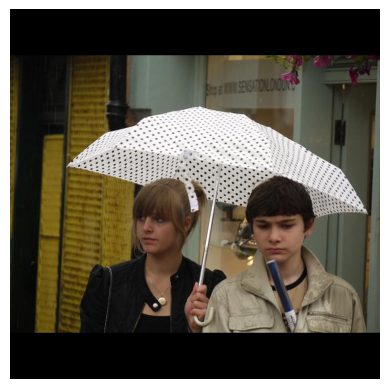

In [ ]:
import cv2
from matplotlib import pyplot as plt
import os

# Path to test images
test_image_path = '/content/COCO-Dataset-34/test/images/'

# List test images
test_images = os.listdir(test_image_path)

# Run inference on the first test image
img_path = os.path.join(test_image_path, test_images[3])

# Perform inference
results = model.predict(img_path, save=True)

# Display result
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




3. **Evaluate Model Performance:**  
   - Compute and display key metrics such as mAP@50, mAP@50-95, Precision, Recall, and F1-Score.
   

In [ ]:
# Evaluate model performance on the validation set
metrics = model.val()


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/COCO-Dataset-34/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


                   all         55        397      0.649      0.111      0.105     0.0839
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          1          0          0          0
        baseball glove          1          4          1          0          0          0
                 bench          3          4          0          0          0          0
               bicycle          3          3          0          0          0          0
                  bird          2          4          1          0          0          0
                  boat          1          1          1          0     0.0622     0.0498
                bottle          4          7      0.113      0.429     0.0654     0.0393
                   bus          3          3      0.184      0.245      0.179      0.179
                  cak

In [ ]:

# Display key metrics
print(f"mAP@50: {metrics.box.map50:.4f}")     # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {metrics.box.map:.4f}")    # Mean Average Precision at IoU 0.5 to 0.95
print(f"Precision: {metrics.box.mp:.4f}")     # Mean Precision
print(f"Recall: {metrics.box.mr:.4f}")         # Mean Recall


mAP@50: 0.1051
mAP@50-95: 0.0839
Precision: 0.6490
Recall: 0.1107


In [ ]:
precision = metrics.box.mp
recall = metrics.box.mr

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1_score:.4f}")
else:
    print("F1 Score: Undefined (precision + recall = 0)")


F1 Score: 0.1891


4. **Visualize Inference Results:**  
   - Use `glob` to locate the saved prediction image, then display it using `matplotlib` or `PIL`.  
     


image 1/1 /content/COCO-Dataset-34/test/images/000000025668_jpg.rf.f67afc05b355ac25bef196980e6d7f99.jpg: 640x640 2 persons, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


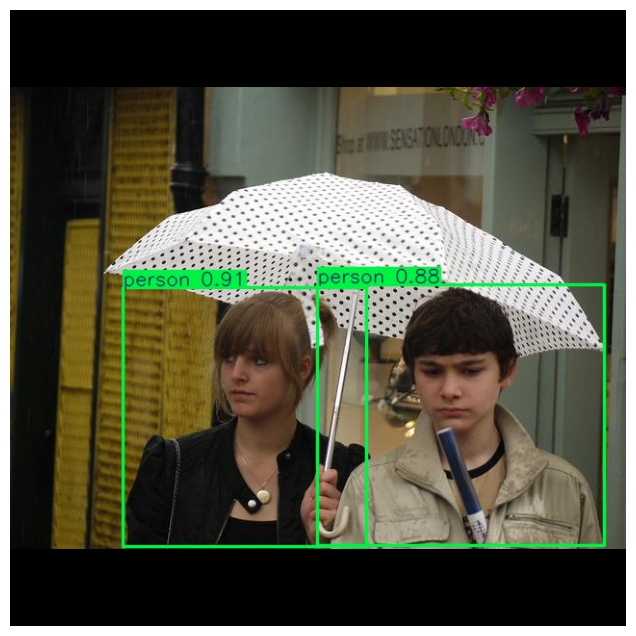

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Run inference
results = model.predict(img_path, save=True, show=False)

# Find the saved prediction file
result_img_path = glob.glob('runs/detect/predict*/*.jpg')[3]

# Load and display the result using PIL and matplotlib
img = Image.open(result_img_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


# **Discussion and Conclusion**

After running inference and visualizing the detection results on the COCO test images, the following performance metrics were observed:
- **mAP@50:** 0.1051
- **mAP@50-95:** 0.0839
- **Precision:** 0.6490
- **Recall:** 0.1107
- **F1 Score:** 0.1891

### **Discussion**:
1. **Precision vs. Recall:**
   - The model achieves a relatively high precision (~0.65), indicating that when it predicts an object, it is often correct.
   - However, the recall is notably low (~0.11), meaning that the model is missing a large number of objects present in the images. This imbalance suggests that while the model is cautious in its predictions, it is not sensitive enough to detect all relevant objects.

2. **Training Considerations:**
   - The current training setup, although a good starting point, appears to be insufficient for achieving robust detection performance on the COCO dataset.
   - Increasing training epochs, applying more extensive data augmentation, and further hyperparameter tuning (such as adjusting the learning rate schedule and modifying anchor boxes) are potential strategies to improve recall without compromising precision.

3. **Visual Inspection:**
   - The visualizations show that detected objects have correctly drawn bounding boxes and appropriate confidence scores. However, many objects are still missed, which is consistent with the low recall metric.
   - The visualization reinforces the notion that while the model is reliable when it makes a detection, its overall sensitivity is low.

### **Conclusion**:
- **Strengths:** The model demonstrates reliable detections when it does identify an object, as evidenced by the high precision. This is promising for applications where false positives are particularly problematic.
- **Weaknesses:** The low recall and overall mAP highlight the need for improvement in detecting all relevant objects in a scene.

  
Overall, this experiment provides valuable insights into the strengths and limitations of using YOLOv11 for object detection on the COCO dataset. With further refinements, the model can be optimized to achieve a more balanced performance, which is crucial for real-world applications.


### **Declaration**

I, Vidhisha Deshmukh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines.

Signature: Vidhisha Moreshwar Deshmukh